In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
appl = pd.read_csv('DataSet/pre_processed_appl.csv')
amzn = pd.read_csv('DataSet/pre_processed_amzn.csv')
msft = pd.read_csv('DataSet/pre_processed_mfst.csv')
goog = pd.read_csv('DataSet/pre_processed_goog.csv')
tsla = pd.read_csv('DataSet/pre_processed_tsla.csv')
meta = pd.read_csv('DataSet/pre_processed_meta.csv')

# Data Processing

In [3]:
def Dataset(Data, Date):

  Train_Data = Data['Adj Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)

  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)

  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

## Model

In [4]:
def Model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
    tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
    ])
  return model

In [5]:
model = Model()

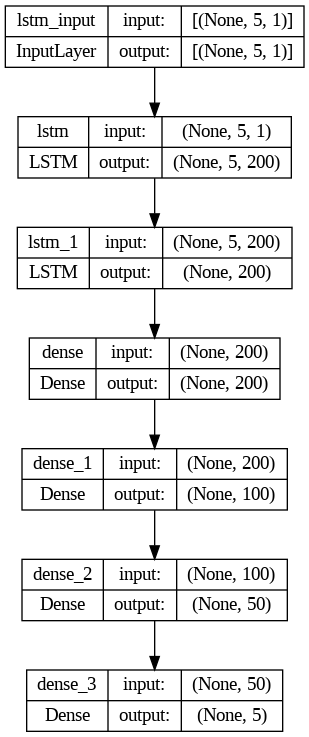

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 548005 (2.09 MB)
Trainable params: 548005 

In [8]:
def scheduler(epoch):

  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150)
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)

  return lrate


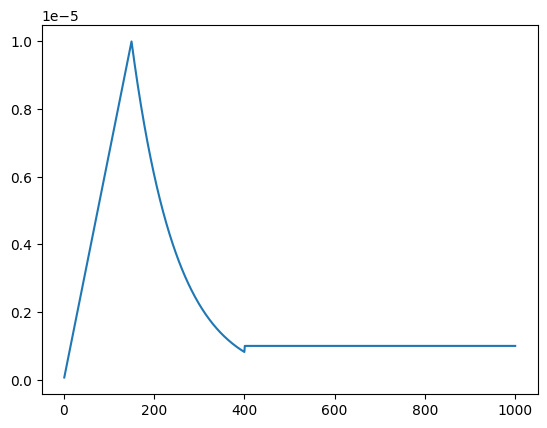

In [9]:

epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [10]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Apple

In [11]:
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.466450,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.777184,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.779427,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.112869,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.039341,237458000


In [12]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2268 non-null   object 
 1   Open       2268 non-null   float64
 2   High       2268 non-null   float64
 3   Low        2268 non-null   float64
 4   Close      2268 non-null   float64
 5   Adj Close  2268 non-null   float64
 6   Volume     2268 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 124.2+ KB


In [13]:
appl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2.268000e+03
mean,84.132736,85.053268,83.266692,84.201429,82.341671,1.236637e+08
std,56.087504,56.717474,55.502900,56.139934,56.628940,6.816456e+07
min,22.500000,22.917500,22.367500,22.584999,20.798660,2.404830e+07
25%,35.475626,35.692500,35.260001,35.455625,33.139778,7.813760e+07
50%,54.175002,54.890000,53.483750,54.022501,51.760682,1.055960e+08
75%,141.794995,143.437500,139.567501,142.005001,140.428787,1.484299e+08
max,198.020004,199.619995,197.000000,198.110001,198.110001,6.488252e+08


In [14]:
# Change Dtype of Date column
appl["Date"] = pd.to_datetime(appl["Date"])

### Split the Data into Training and Test set
* Training Period: 2015-01-02 - 2022-09-30

* Testing Period:  2022-10-01 - 2024-01-05

In [15]:
AAPL_Date = '2022-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(appl, AAPL_Date)

### Model Fit

In [16]:
AAPL_Model = Model()

In [17]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [18]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])


Epoch 1/1000
13/13 [==============================] - 7s 58ms/step - loss: 7024.3882 - root_mean_squared_error: 83.8116 - val_loss: 27965.3672 - val_root_mean_squared_error: 167.2285 - lr: 0.0000e+00
Epoch 2/1000
13/13 [==============================] - 0s 21ms/step - loss: 7024.3247 - root_mean_squared_error: 83.8112 - val_loss: 27964.7031 - val_root_mean_squared_error: 167.2265 - lr: 6.6667e-08
Epoch 3/1000
13/13 [==============================] - 0s 21ms/step - loss: 7024.1201 - root_mean_squared_error: 83.8100 - val_loss: 27963.3750 - val_root_mean_squared_error: 167.2225 - lr: 1.3333e-07
Epoch 4/1000
13/13 [==============================] - 0s 23ms/step - loss: 7023.7661 - root_mean_squared_error: 83.8079 - val_loss: 27961.4473 - val_root_mean_squared_error: 167.2168 - lr: 2.0000e-07
Epoch 5/1000
13/13 [==============================] - 0s 24ms/step - loss: 7023.2759 - root_mean_squared_error: 83.8050 - val_loss: 27958.7891 - val_root_mean_squared_error: 167.2088 - lr: 2.6667e-07


In [19]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

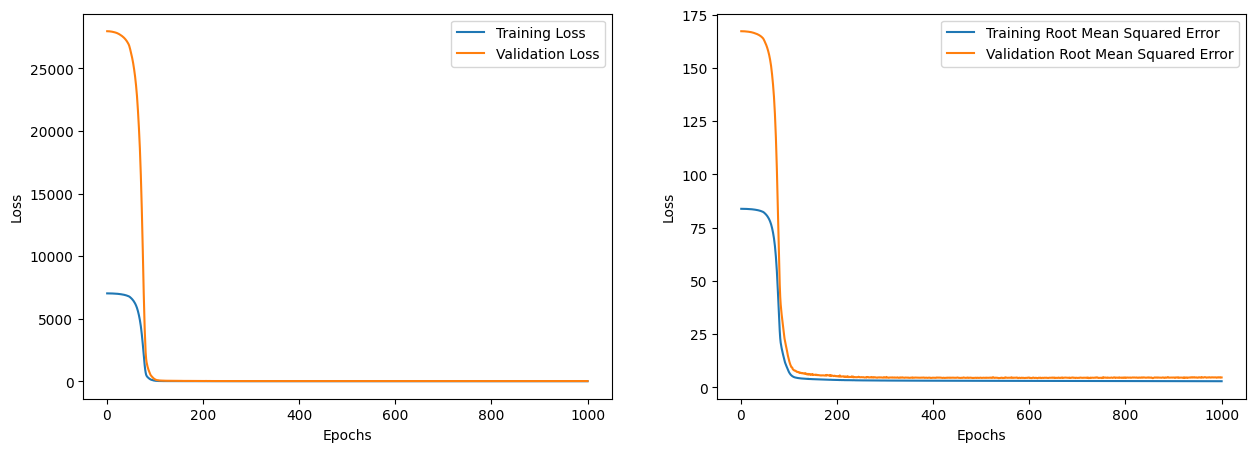

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Apple

In [21]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

2/2 [==============================] - 0s 9ms/step


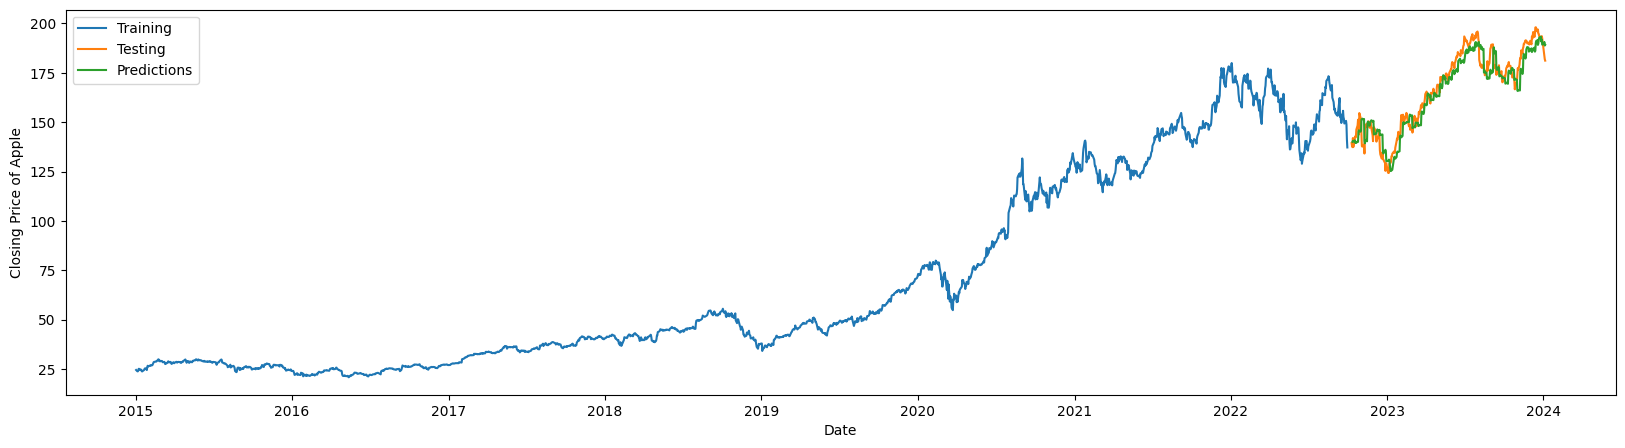

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(appl['Date'][appl['Date'] < '2022-10-01'], appl['Adj Close'][appl['Date'] < '2022-10-01'], label = 'Training')
plt.plot(appl['Date'][appl['Date'] >= '2022-10-09'], appl['Adj Close'][appl['Date'] >= '2022-10-09'], label = 'Testing')
plt.plot(appl['Date'][appl['Date'] >= '2022-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price of Apple')
plt.legend(loc = 'best')

In [23]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.594606052931396
MAPE: 0.022841572577936793


# Tesla

In [24]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [25]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2268 non-null   object 
 1   Open       2268 non-null   float64
 2   High       2268 non-null   float64
 3   Low        2268 non-null   float64
 4   Close      2268 non-null   float64
 5   Adj Close  2268 non-null   float64
 6   Volume     2268 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 124.2+ KB


In [26]:
# Chamnge Dtype of Date col
tsla['Date'] = pd.to_datetime(tsla['Date'])


### Split the Data into Training and Test set
* Training Period: 2015-01-02 - 2022-09-30

* Testing Period:  2022-10-01 - 2024-01-05

In [27]:
TSLA_Date = '2022-10-01'
TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, TSLA_Test_Y = Dataset(tsla, TSLA_Date)


### Model Fiting

In [28]:
TSLA_Model = Model()

In [29]:
TSLA_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=tf.keras.metrics.RootMeanSquaredError())

In [30]:
TSLA_hist = TSLA_Model.fit(TSLA_Train_X, TSLA_Train_Y, epochs = 200, validation_data = (TSLA_Test_X, TSLA_Test_Y), callbacks=[callback])

Epoch 1/200
13/13 [==============================] - 4s 84ms/step - loss: 19109.9160 - root_mean_squared_error: 138.2386 - val_loss: 46567.9648 - val_root_mean_squared_error: 215.7961 - lr: 0.0000e+00
Epoch 2/200
13/13 [==============================] - 1s 40ms/step - loss: 19109.7461 - root_mean_squared_error: 138.2380 - val_loss: 46566.9844 - val_root_mean_squared_error: 215.7938 - lr: 6.6667e-08
Epoch 3/200
13/13 [==============================] - 1s 40ms/step - loss: 19109.1562 - root_mean_squared_error: 138.2359 - val_loss: 46564.9766 - val_root_mean_squared_error: 215.7892 - lr: 1.3333e-07
Epoch 4/200
13/13 [==============================] - 1s 40ms/step - loss: 19108.1855 - root_mean_squared_error: 138.2323 - val_loss: 46562.1602 - val_root_mean_squared_error: 215.7827 - lr: 2.0000e-07
Epoch 5/200
13/13 [==============================] - 0s 37ms/step - loss: 19106.8770 - root_mean_squared_error: 138.2276 - val_loss: 46558.2539 - val_root_mean_squared_error: 215.7736 - lr: 2.6667

In [31]:
history_dict = TSLA_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

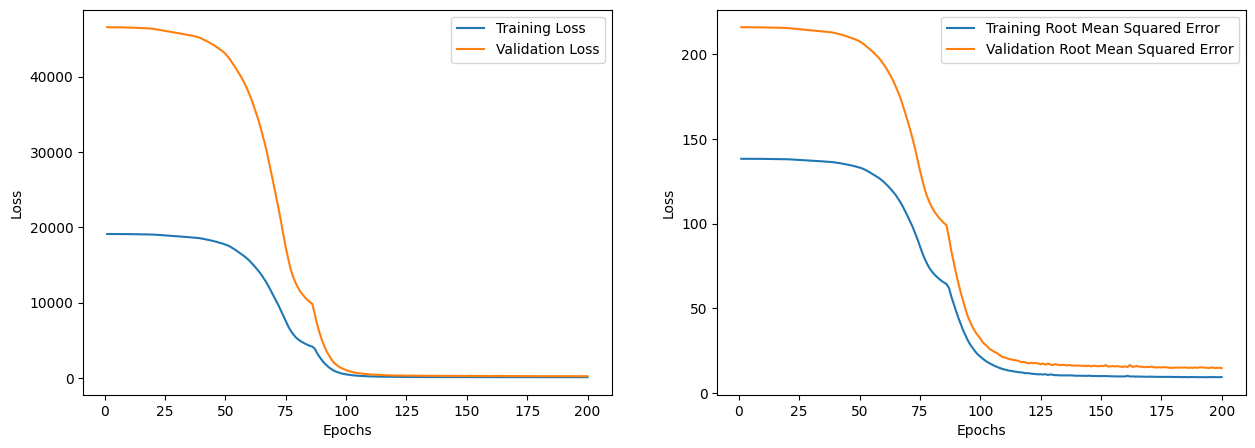

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Tesla


In [33]:
TSLA_prediction = TSLA_Model.predict(TSLA_Test_X)


2/2 [==============================] - 0s 7ms/step


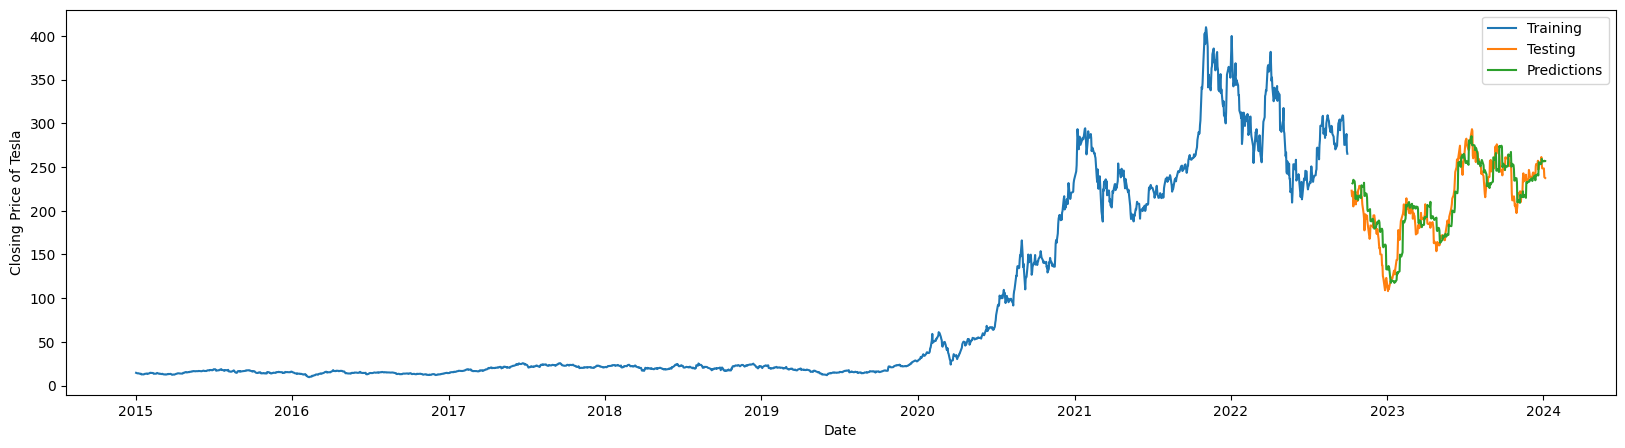

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(tsla['Date'][tsla['Date'] < '2022-10-01'], tsla['Adj Close'][tsla['Date'] < '2022-10-01'], label = 'Training')
plt.plot(tsla['Date'][tsla['Date'] >= '2022-10-09'], tsla['Adj Close'][tsla['Date'] >= '2022-10-09'], label = 'Testing')
plt.plot(tsla['Date'][tsla['Date'] >= '2022-10-12'], TSLA_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price of Tesla')
plt.legend(loc = 'best')

In [35]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Y.reshape(-1, 5), TSLA_prediction))
mape = np.mean(np.abs(TSLA_prediction - TSLA_Test_Y.reshape(-1, 5))/np.abs(TSLA_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 14.836839314215162
MAPE: 0.05962724142030351


# Google

In [36]:
goog.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [37]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2268 non-null   object 
 1   Open       2268 non-null   float64
 2   High       2268 non-null   float64
 3   Low        2268 non-null   float64
 4   Close      2268 non-null   float64
 5   Adj Close  2268 non-null   float64
 6   Volume     2268 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 124.2+ KB


In [38]:
# Change Dtype of Date column
goog["Date"] = pd.to_datetime(goog["Date"])


### Split the Data into Training and Test set
* Training Period: 2015-01-02 - 2022-09-30

* Testing Period:  2022-11-01 - 2024-01-05

In [39]:
GOOG_Date = '2022-11-01'
GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(goog, GOOG_Date)


## Model Fiting

In [40]:
GOOG_Model = Model()

In [41]:
GOOG_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [42]:
GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 1000, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks = [callback])

Epoch 1/1000
13/13 [==============================] - 5s 52ms/step - loss: 5697.8740 - root_mean_squared_error: 75.4843 - val_loss: 13805.4863 - val_root_mean_squared_error: 117.4967 - lr: 0.0000e+00
Epoch 2/1000
13/13 [==============================] - 0s 22ms/step - loss: 5697.8262 - root_mean_squared_error: 75.4839 - val_loss: 13805.1865 - val_root_mean_squared_error: 117.4955 - lr: 6.6667e-08
Epoch 3/1000
13/13 [==============================] - 0s 23ms/step - loss: 5697.6631 - root_mean_squared_error: 75.4829 - val_loss: 13804.5918 - val_root_mean_squared_error: 117.4929 - lr: 1.3333e-07
Epoch 4/1000
13/13 [==============================] - 0s 21ms/step - loss: 5697.3872 - root_mean_squared_error: 75.4810 - val_loss: 13803.7109 - val_root_mean_squared_error: 117.4892 - lr: 2.0000e-07
Epoch 5/1000
13/13 [==============================] - 0s 22ms/step - loss: 5696.9966 - root_mean_squared_error: 75.4784 - val_loss: 13802.5010 - val_root_mean_squared_error: 117.4840 - lr: 2.6667e-07


In [43]:
history_dict = GOOG_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)


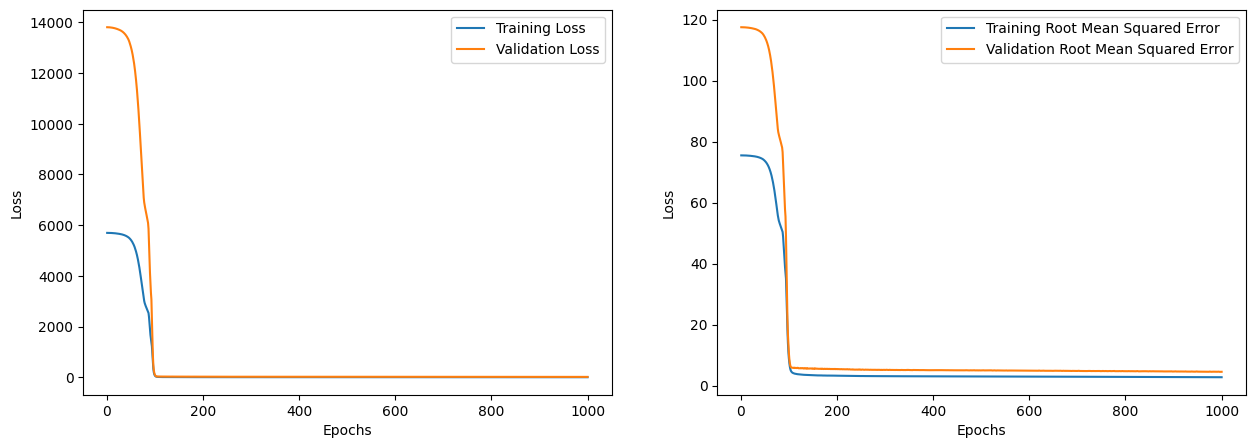

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

## Predicting the closing stock price of Google

In [45]:
GOOG_prediction = GOOG_Model.predict(GOOG_Test_X)

2/2 [==============================] - 0s 8ms/step


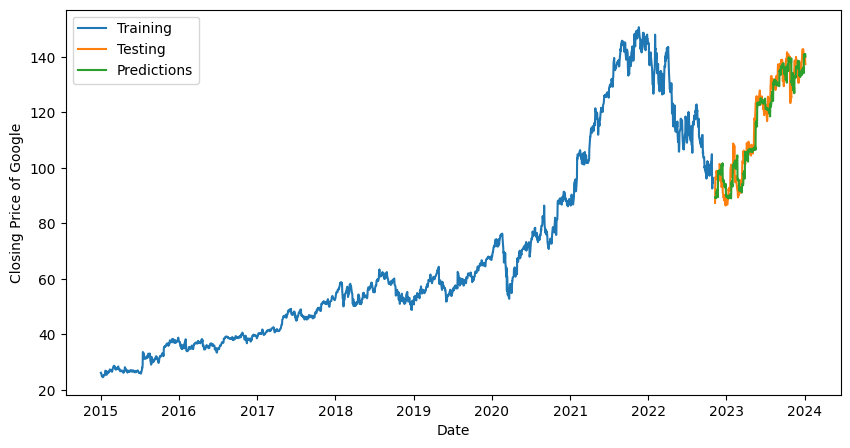

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(goog['Date'][goog['Date'] < '2022-11-01'], goog['Adj Close'][goog['Date'] < '2022-11-01'], label = 'Training')
plt.plot(goog['Date'][goog['Date'] >= '2022-11-09'], goog['Adj Close'][goog['Date'] >= '2022-11-09'], label = 'Testing')
plt.plot(goog['Date'][goog['Date'] >= '2022-11-09'], GOOG_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price of Google')
plt.legend(loc = 'best')

In [47]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.5385076026325075
MAPE: 0.03103277887233626


# Microsoft

In [48]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,46.660000,47.419998,46.540001,46.759998,40.452736,27913900
1,2015-01-05,46.369999,46.730000,46.250000,46.330002,40.080742,39673900
2,2015-01-06,46.380001,46.750000,45.540001,45.650002,39.492462,36447900
3,2015-01-07,45.980000,46.459999,45.490002,46.230000,39.994228,29114100
4,2015-01-08,46.750000,47.750000,46.720001,47.590000,41.170792,29645200


In [49]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2268 non-null   object 
 1   Open       2268 non-null   float64
 2   High       2268 non-null   float64
 3   Low        2268 non-null   float64
 4   Close      2268 non-null   float64
 5   Adj Close  2268 non-null   float64
 6   Volume     2268 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 124.2+ KB


In [50]:
# Change Dtype of Date Col
msft['Date'] = pd.to_datetime(msft['Date'])


### Split the Data into Training and Test set
* Training Period: 2015-01-02 - 2022-09-30

* Testing Period:  2022-10-01 - 2024-01-05

In [51]:
MSFT_Date = '2022-10-01'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(msft, MSFT_Date)

In [52]:
MSFT_Model = Model()

In [53]:
MSFT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [54]:
MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 1000, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

Epoch 1/1000
13/13 [==============================] - 5s 50ms/step - loss: 25496.3574 - root_mean_squared_error: 159.6758 - val_loss: 89985.6875 - val_root_mean_squared_error: 299.9761 - lr: 0.0000e+00
Epoch 2/1000
13/13 [==============================] - 0s 20ms/step - loss: 25495.6641 - root_mean_squared_error: 159.6736 - val_loss: 89979.7578 - val_root_mean_squared_error: 299.9663 - lr: 6.6667e-08
Epoch 3/1000
13/13 [==============================] - 0s 21ms/step - loss: 25493.3887 - root_mean_squared_error: 159.6665 - val_loss: 89967.7109 - val_root_mean_squared_error: 299.9462 - lr: 1.3333e-07
Epoch 4/1000
13/13 [==============================] - 0s 21ms/step - loss: 25489.5938 - root_mean_squared_error: 159.6546 - val_loss: 89950.0469 - val_root_mean_squared_error: 299.9167 - lr: 2.0000e-07
Epoch 5/1000
13/13 [==============================] - 0s 23ms/step - loss: 25484.0664 - root_mean_squared_error: 159.6373 - val_loss: 89926.5781 - val_root_mean_squared_error: 299.8776 - lr: 2

In [55]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

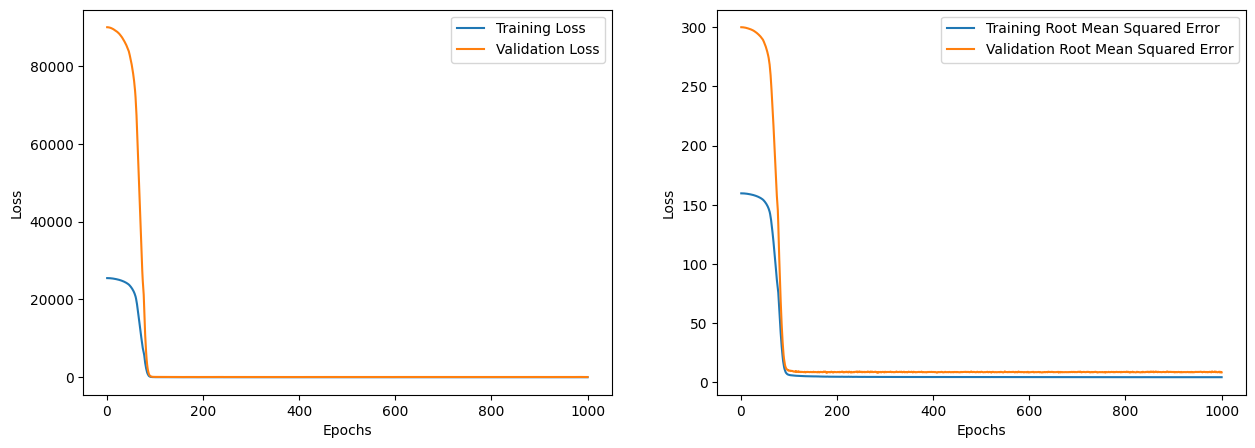

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

## Predicting the closing stock price of Microsoft


In [57]:
MSFT_prediction = MSFT_Model.predict(MSFT_Test_X)

2/2 [==============================] - 0s 9ms/step


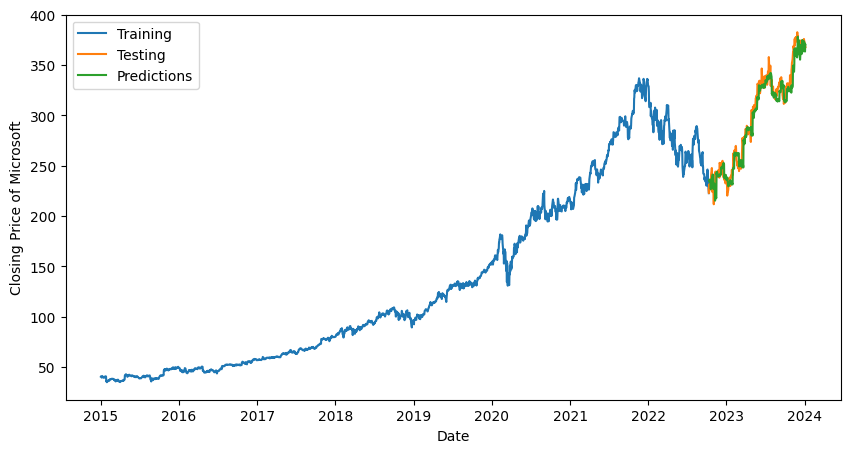

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(msft['Date'][msft['Date'] < '2022-10-12'], msft['Adj Close'][msft['Date'] < '2022-10-12'], label = 'Training')
plt.plot(msft['Date'][msft['Date'] >= '2022-10-09'], msft['Adj Close'][msft['Date'] >= '2022-10-09'], label = 'Testing')
plt.plot(msft['Date'][msft['Date'] >= '2022-10-12'], MSFT_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price of Microsoft')
plt.legend(loc = 'best')

In [59]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Test_Y.reshape(-1, 5))/np.abs(MSFT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 8.457689759297525
MAPE: 0.022344660682833573


# Amazon

In [60]:
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
1,2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2,2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
3,2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
4,2015-01-08,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [61]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2268 non-null   object 
 1   Open       2268 non-null   float64
 2   High       2268 non-null   float64
 3   Low        2268 non-null   float64
 4   Close      2268 non-null   float64
 5   Adj Close  2268 non-null   float64
 6   Volume     2268 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 124.2+ KB


In [62]:
# Change Dtype of Date column
amzn["Date"] = pd.to_datetime(amzn["Date"])


### Split the Data into Training and Test set
* Training Period: 2015-01-02 - 2022-09-30

* Testing Period:  2022-10-01 - 2024-01-05

In [63]:
AMZN_Date = '2022-10-01'
AMZN_Train_X, AMZN_Train_Y, AMZN_Test_X, AMZN_Test_Y = Dataset(amzn, AMZN_Date)

## Model Fiting

In [64]:
AMZN_Model = Model()

In [65]:
AMZN_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [66]:
AMZN_hist = AMZN_Model.fit(AMZN_Train_X, AMZN_Train_Y, epochs = 200, validation_data = (AMZN_Test_X, AMZN_Test_Y), callbacks=[callback])

Epoch 1/200
13/13 [==============================] - 4s 51ms/step - loss: 10226.7334 - root_mean_squared_error: 101.1273 - val_loss: 13957.0957 - val_root_mean_squared_error: 118.1402 - lr: 0.0000e+00
Epoch 2/200
13/13 [==============================] - 0s 21ms/step - loss: 10226.5098 - root_mean_squared_error: 101.1262 - val_loss: 13956.4062 - val_root_mean_squared_error: 118.1372 - lr: 6.6667e-08
Epoch 3/200
13/13 [==============================] - 0s 22ms/step - loss: 10225.7852 - root_mean_squared_error: 101.1226 - val_loss: 13954.9316 - val_root_mean_squared_error: 118.1310 - lr: 1.3333e-07
Epoch 4/200
13/13 [==============================] - 0s 21ms/step - loss: 10224.4775 - root_mean_squared_error: 101.1162 - val_loss: 13952.7891 - val_root_mean_squared_error: 118.1219 - lr: 2.0000e-07
Epoch 5/200
13/13 [==============================] - 0s 20ms/step - loss: 10222.6475 - root_mean_squared_error: 101.1071 - val_loss: 13949.8779 - val_root_mean_squared_error: 118.1096 - lr: 2.6667

In [67]:
history_dict = AMZN_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

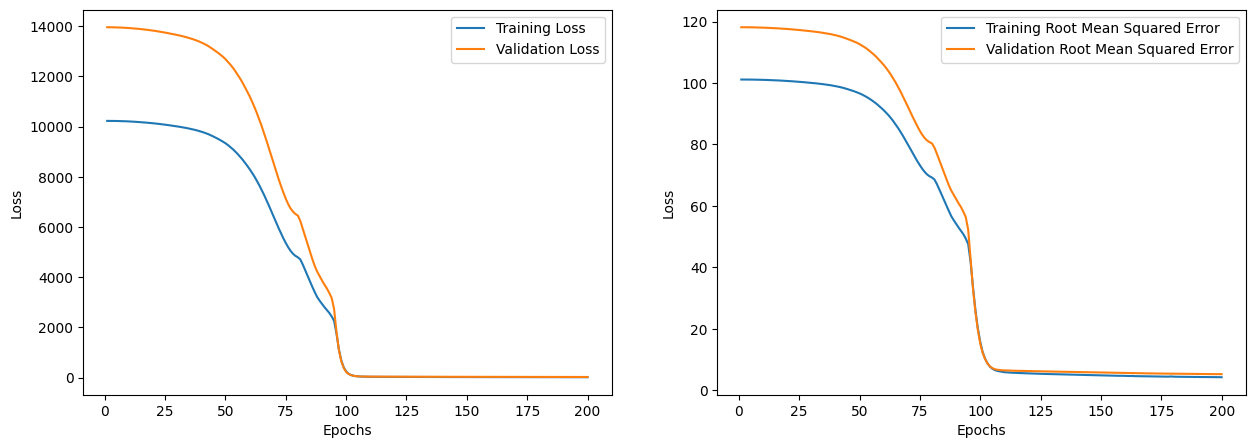

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

## Predicting the closing stock price of Amazon

In [69]:
AMZN_prediction = AMZN_Model.predict(AMZN_Test_X)

2/2 [==============================] - 0s 9ms/step


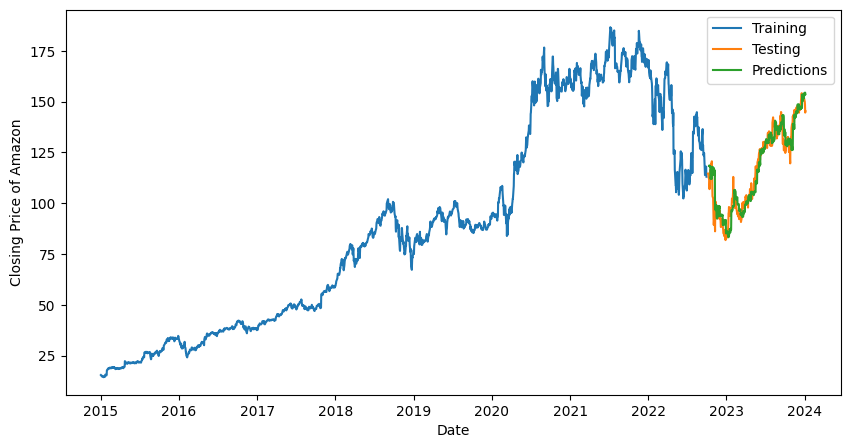

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(amzn['Date'][amzn['Date'] < '2022-10-01'], amzn['Adj Close'][amzn['Date'] < '2022-10-01'], label = 'Training')
plt.plot(amzn['Date'][amzn['Date'] >= '2022-10-07'], amzn['Adj Close'][amzn['Date'] >= '2022-10-07'], label = 'Testing')
plt.plot(amzn['Date'][amzn['Date'] >= '2022-10-12'], AMZN_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price of Amazon')
plt.legend(loc = 'best')

In [71]:
rmse = math.sqrt(mean_squared_error(AMZN_Test_Y.reshape(-1, 5), AMZN_prediction))
mape = np.mean(np.abs(AMZN_prediction - AMZN_Test_Y.reshape(-1, 5))/np.abs(AMZN_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 5.27604557287716
MAPE: 0.03408543933937793


# Meta

In [72]:
meta.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [73]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2268 non-null   object 
 1   Open       2268 non-null   float64
 2   High       2268 non-null   float64
 3   Low        2268 non-null   float64
 4   Close      2268 non-null   float64
 5   Adj Close  2268 non-null   float64
 6   Volume     2268 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 124.2+ KB


In [74]:
# Change Dtype of Date column
meta["Date"] = pd.to_datetime(meta["Date"])


### Split the Data into Training and Test set
* Training Period: 2015-01-02 - 2022-09-30

* Testing Period:  2022-10-01 - 2024-01-05

In [75]:
META_Date = '2022-10-01'
META_Train_X, META_Train_Y, META_Test_X, META_Test_Y = Dataset(meta, META_Date)

In [76]:
META_Model = Model()

In [77]:
META_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [78]:
META_hist = META_Model.fit(META_Train_X, META_Train_Y, epochs = 200, validation_data = (META_Test_X, META_Test_Y), callbacks=[callback])

Epoch 1/200
13/13 [==============================] - 4s 51ms/step - loss: 38822.4297 - root_mean_squared_error: 197.0341 - val_loss: 61026.9219 - val_root_mean_squared_error: 247.0363 - lr: 0.0000e+00
Epoch 2/200
13/13 [==============================] - 1s 41ms/step - loss: 38822.0664 - root_mean_squared_error: 197.0332 - val_loss: 61025.3477 - val_root_mean_squared_error: 247.0331 - lr: 6.6667e-08
Epoch 3/200
13/13 [==============================] - 1s 41ms/step - loss: 38820.7773 - root_mean_squared_error: 197.0299 - val_loss: 61022.1680 - val_root_mean_squared_error: 247.0267 - lr: 1.3333e-07
Epoch 4/200
13/13 [==============================] - 1s 41ms/step - loss: 38818.6250 - root_mean_squared_error: 197.0244 - val_loss: 61017.2852 - val_root_mean_squared_error: 247.0168 - lr: 2.0000e-07
Epoch 5/200
13/13 [==============================] - 1s 40ms/step - loss: 38815.5625 - root_mean_squared_error: 197.0167 - val_loss: 61010.8672 - val_root_mean_squared_error: 247.0038 - lr: 2.6667

In [79]:
history_dict = META_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

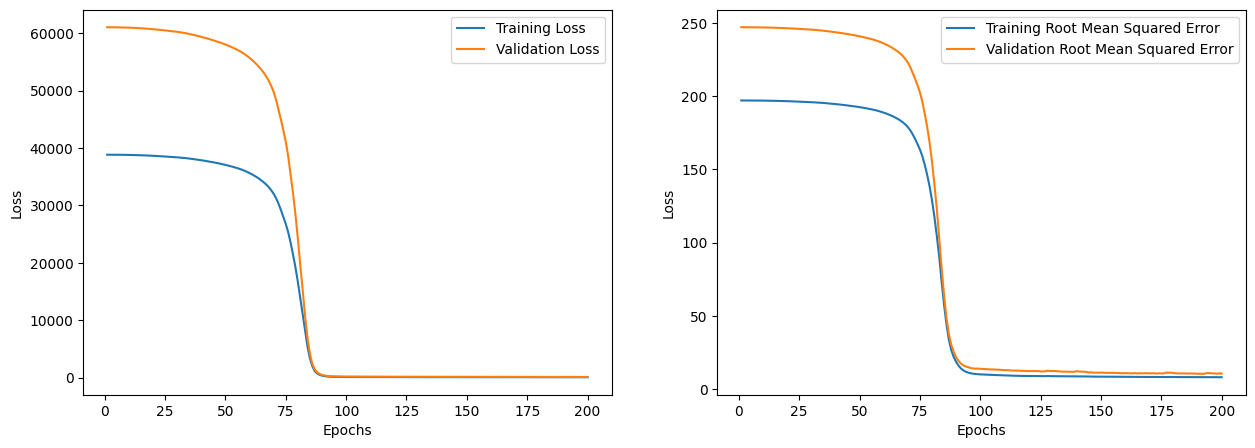

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

## Predicting the closing stock price of Meta

In [81]:
META_prediction = META_Model.predict(META_Test_X)


2/2 [==============================] - 0s 8ms/step


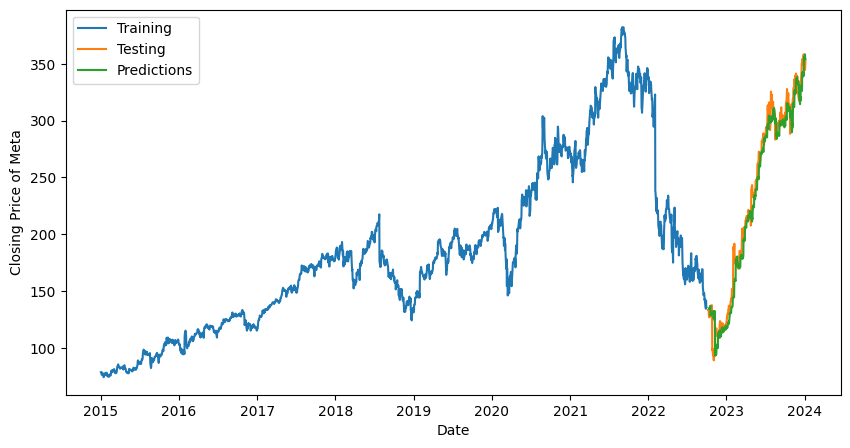

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(meta['Date'][meta['Date'] < '2022-10-01'], meta['Adj Close'][meta['Date'] < '2022-10-01'], label = 'Training')
plt.plot(meta['Date'][meta['Date'] >= '2022-10-07'], meta['Adj Close'][meta['Date'] >= '2022-10-07'], label = 'Testing')
plt.plot(meta['Date'][meta['Date'] >= '2022-10-12'], META_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price of Meta')
plt.legend(loc = 'best')

In [83]:
rmse = math.sqrt(mean_squared_error(META_Test_Y.reshape(-1, 5), META_prediction))
mape = np.mean(np.abs(META_prediction - META_Test_Y.reshape(-1, 5))/np.abs(META_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 10.622836335467218
MAPE: 0.03986722964537367
